In [5]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
#Mudando estilo dos gráficos
plt.style.use("seaborn-v0_8-notebook")

In [6]:
#Caso utilize google colab, para fazer upload de arquivo, também é possível utilizar a biblioteca google.colab:
#from google.colab import files
#arq = files.upload()

In [8]:
#Lendo arquivo excel em dataframe:
df = pd.read_excel("datasets\\AdventureWorks.xlsx")

In [9]:
#Visualizando 5 primeiras linhas:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [10]:
#Quantidade de linhas e colunas:
df.shape

(904, 16)

In [11]:
#Verificando os tipos de dados:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [12]:
#Qual a receita total?
df["Valor Venda"].sum()

5984606.1426

In [13]:
#Custo?
#Custo Unitário x Quantidade:
df["custo"] = df["Custo Unitário"] * df["Quantidade"]

In [14]:
#Custo total arredondado
round(df["custo"].sum(), 2)

2486783.05

In [17]:
#Lucro?
#Receita - custo
df["lucro"] = df["Valor Venda"] - df["custo"]

In [18]:
#Lucro total arredondado
round(df["lucro"].sum(), 2)

3497823.09

In [19]:
#Tempo para envio:
df["tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [21]:
df.dtypes

Data Venda         datetime64[ns]
Data Envio         datetime64[ns]
ID Loja                     int64
ID Produto                  int64
ID Cliente                  int64
No. Venda                  object
Custo Unitário            float64
Preço Unitário            float64
Quantidade                  int64
Valor Desconto            float64
Valor Venda               float64
Produto                    object
Fabricante                 object
Marca                      object
Classe                     object
Cor                        object
custo                     float64
lucro                     float64
tempo_envio       timedelta64[ns]
dtype: object

In [24]:
#Verifica-se que o tempo_envio tem tipo timedelta, e não inteiro. Para acessar o valor inteiro
#pode-se usar dt.days por exemplo. Ou pode-se criar a coluna já em dt.days para que ela seja inteiro:
df["tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [25]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
custo                    float64
lucro                    float64
tempo_envio                int64
dtype: object

In [26]:
#Média de tempo de envio por marca:
df.groupby("Marca")["tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: tempo_envio, dtype: float64

In [27]:
#Tem valores ausentes?
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
tempo_envio       0
dtype: int64

In [29]:
#Lucro por ano e por marca:
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [32]:
#Mudando os números de notação científica para arredondamento em duas casas:
pd.options.display.float_format = '{:20,.2f}'.format
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [33]:
#Resetando o index para criar um dataframe a partir de dados agrupados:
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()

In [34]:
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [35]:
#Total de produtos vendidos em ordem do mais vendido para o menos vendido?:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

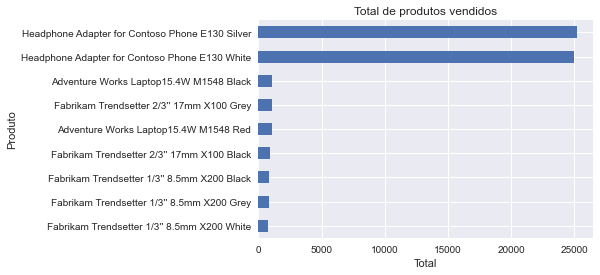

In [37]:
#Gráfico total de produtos vendidos:
#Verifica-se a necessidade de mudar o sort_values(ascending) de False para True
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de produtos vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

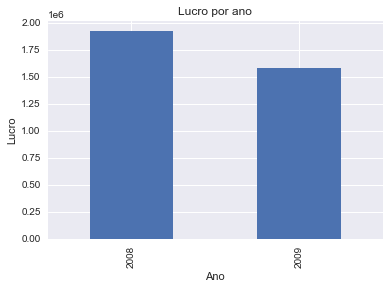

In [40]:
#Lucro por ano:
#Em notação científica
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro por ano")
plt.xlabel("Ano")
plt.ylabel("Lucro");

In [41]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [42]:
#Selecionando apenas as vendas de 2009:
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [43]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


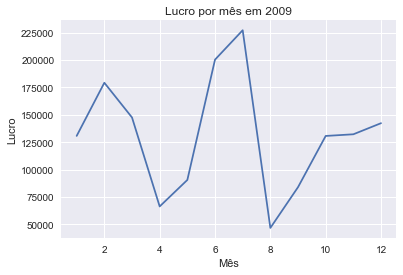

In [45]:
#Lucro por mês em 2009:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro por mês em 2009")
plt.xlabel("Mês")
plt.ylabel("Lucro");

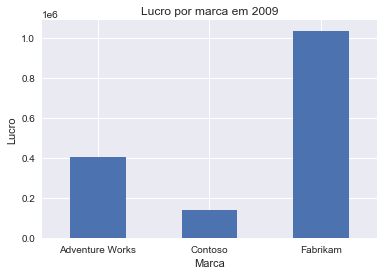

In [46]:
#Lucro por marca
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro por marca em 2009")
plt.xlabel("Marca")
plt.ylabel("Lucro")
#Deixando os valores do eixo X na horizontal:
plt.xticks(rotation="horizontal");

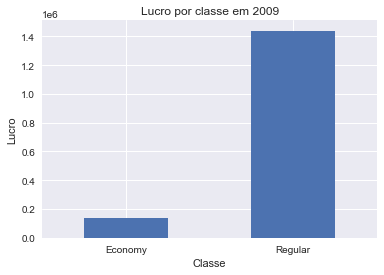

In [49]:
#Lucro por classe
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro por classe em 2009")
plt.xlabel("Classe")
plt.ylabel("Lucro")
#Deixando os valores do eixo X na horizontal:
plt.xticks(rotation="horizontal");

In [50]:
df["tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: tempo_envio, dtype: float64

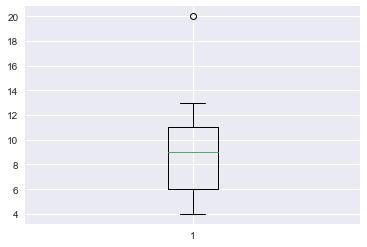

In [52]:
#Gráfico boxplot
plt.boxplot(df["tempo_envio"]);

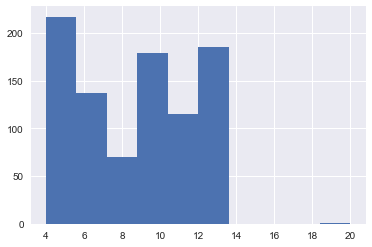

In [54]:
#Histograma
plt.hist(df["tempo_envio"]);

In [55]:
#Verificando o outlier de 20 dias para envio:
df[df["tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [56]:
#Salvando o dataframe analisado em CSV:
df.to_csv("df_vendas_novo.csv", index=False)